# First trial at displaying a coal seam using a PolyData

We only work on the first polygon for now...

In [7]:
import geopandas as gpd
import pyvista as pv
from shapely.geometry import Polygon
import numpy as np

In [8]:
gdf = gpd.read_file('../../../../data/example.gpkg', layer = 'Parties exploitées - Caillette')

In [9]:
gdf.head()

,Année,geometry
0,1941,"POLYGON Z ((154613.672 123991.170 -663.000, 15..."
1,1942,"POLYGON Z ((154816.546 123955.316 -671.100, 15..."
2,1939,"POLYGON Z ((154912.246 123824.192 -686.800, 15..."
3,1942,"POLYGON Z ((154868.618 123744.141 -698.900, 15..."
4,1938,"POLYGON Z ((154949.664 123925.004 -679.300, 15..."


In [10]:
row = gdf.loc[0,:]

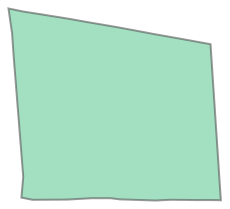

In [11]:
row.geometry

In [12]:
if isinstance(row.geometry, Polygon):
                number_of_vertices = len(list(row.geometry.exterior.coords))
                if row.geometry.has_z:  # TODO: Can we handle Polygons with holes?
                    vertices = list(row.geometry.exterior.coords)
                else:
                    vertices = zip(row.geometry.exterior.xy[0], row.geometry.exterior.xy[1],
                                   itertools.repeat(row[elevation]))

In [13]:
vertices = np.array(vertices)
vertices

array([[154613.67249129, 123991.16964395,   -663.        ],
       [154628.16995739, 123988.16219088,   -663.        ],
       [154655.54549179, 123983.84379672,   -664.3       ],
       [154674.36135205, 123980.83634365,   -664.8       ],
       [154692.17472795, 123977.59754803,   -665.2       ],
       [154723.71442814, 123972.23811242,   -666.        ],
       [154758.12663158, 123965.79907828,   -667.        ],
       [154772.82652241, 123963.18683538,   -668.        ],
       [154791.95083939, 123959.78417213,   -669.        ],
       [154811.57639856, 123956.19836269,   -671.1       ],
       [154816.51170617, 123955.31154961,   -671.3       ],
       [154826.86428502, 123798.69264721,   -700.8       ],
       [154813.253632  , 123798.84687557,   -703.2       ],
       [154800.76113462, 123798.84687557,   -705.        ],
       [154776.47016748, 123799.1167752 ,   -710.        ],
       [154761.35578793, 123798.38419048,   -711.7       ],
       [154725.34346522, 123799.5409032 

In [14]:
face = [number_of_vertices-1]
face.extend([i for i in range(number_of_vertices-1)])
face = np.array(face)
face

array([25,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24])

In [15]:
polygon = pv.PolyData(vertices, face)
polygon.point_data['Elevation'] = vertices.T[2]

## Interactive representation

In [16]:
dargs = dict(scalars='Elevation', cmap='rainbow', show_edges=True, window_size=(1024,480))

polygon.plot(jupyter_backend='panel', color='w', style='surface', interpolate_before_map=True,
           scalar_bar_args={'title': 'Elevation'},
           **dargs)

## Static representation for thumbnail

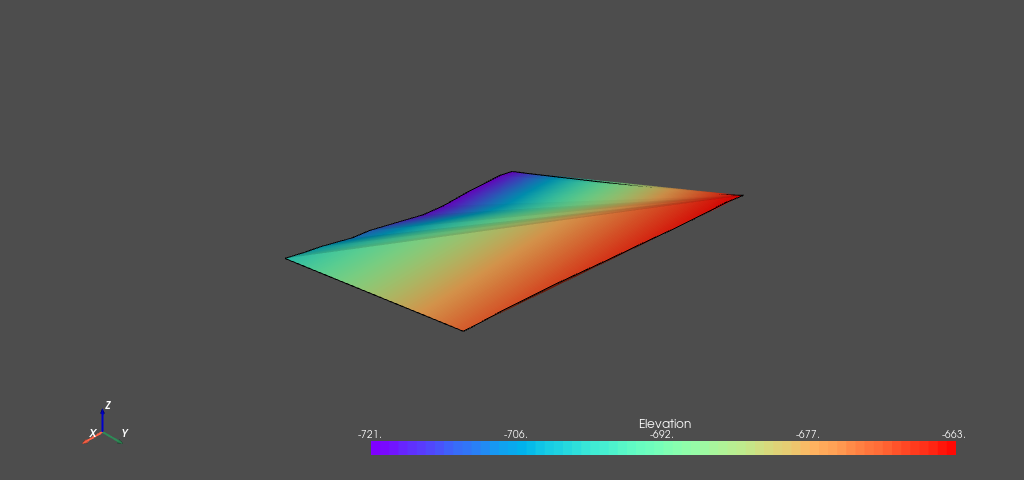

In [17]:
dargs = dict(scalars='Elevation', cmap='rainbow', show_edges=True, window_size=(1024,480))

polygon.plot(jupyter_backend='static', color='w', style='surface', interpolate_before_map=True,
        scalar_bar_args={'title': 'Elevation'}, **dargs)